In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [3]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 6432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='6432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: postgres


In [4]:
from sqlalchemy import create_engine,text
con= create_engine('postgresql://eicu@192.168.60.144:6432/eicu')

In [5]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir2 = '/home/mei/nas/docker/processedData_2/'

In [6]:
def round_up(x, base=5):
    return base * round(x/base)

In [9]:
query = query_schema + """
select vp.*
from vitalperiodic vp
join patient_2 p
  on vp.patientunitstayid = p.patientunitstayid
  
order by p.patientunitstayid, vp.observationoffset
"""

In [10]:
df_vitalp= pd.read_sql_query(query,con)
df_vitalp.head(n=20)

,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,37449174,141168,119,NaN,93.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37448979,141168,124,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37448785,141168,129,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37448594,141168,134,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37448402,141168,139,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,37448210,141168,144,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,37448020,141168,149,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,37447831,141168,154,NaN,NaN,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,37447641,141168,159,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,37447450,141168,164,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
vitalp = df_vitalp.copy()
# Set indices
vitalp.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
vitalp.drop(vitalp.index[np.where(vitalp.index.get_level_values('observationoffset') < 0)], inplace= True)
vitalp.drop(columns = 'vitalperiodicid', inplace= True)
vitalp.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)
# Resample every 5 mins
vitalp.rename(round_up, level = 'observationoffset', inplace = True)
vitalp = vitalp.groupby(['patientunitstayid', 'observationoffset']).mean()

In [12]:
vitalp.head(n=10)

temperature  sao2  heartrate  \
patientunitstayid observationoffset                                 
141168            120                        NaN  93.0      140.0   
                  125                        NaN   NaN      140.0   
                  130                        NaN   NaN      140.0   
                  135                        NaN   NaN      140.0   
                  140                        NaN   NaN      140.0   
                  145                        NaN   NaN      140.0   
                  150                        NaN   NaN      140.0   
                  155                        NaN   NaN      136.0   
                  160                        NaN   NaN      132.0   
                  165                        NaN   NaN      132.0   

                                     respiration  cvp  etco2  \
patientunitstayid observationoffset                            
141168            120                        NaN  NaN    NaN   
                  125                        NaN  NaN    NaN   
                  130                        NaN  NaN    NaN   
                  135                        NaN  NaN    NaN   
                  140                        NaN  NaN    NaN   
                  145                        NaN  NaN    NaN   
                  150                        NaN  NaN    NaN   
                  155                        NaN  NaN    NaN   
                  160                        NaN  NaN    NaN   
                  165                        NaN  NaN    NaN   

                                     systemicsystolic  systemicdiastolic  \
patientunitstayid observationoffset                                        
141168            120                             NaN                NaN   
                  125                             NaN                NaN   
                  130                             NaN                NaN   
                  135                             NaN                NaN   
                  140                             NaN                NaN   
                  145                             NaN                NaN   
                  150                             NaN                NaN   
                  155                             NaN                NaN   
                  160                             NaN                NaN   
                  165                             NaN                NaN   

                                     systemicmean  pasystolic  padiastolic  \
patientunitstayid observationoffset                                          
141168            120                         NaN         NaN          NaN   
                  125                         NaN         NaN          NaN   
                  130                         NaN         NaN          NaN   
                  135                         NaN         NaN          NaN   
                  140                         NaN         NaN          NaN   
                  145                         NaN         NaN          NaN   
                  150                         NaN         NaN          NaN   
                  155                         NaN         NaN          NaN   
                  160                         NaN         NaN          NaN   
                  165                         NaN         NaN          NaN   

                                     pamean  st1  st2  st3  icp  
patientunitstayid observationoffset                              
141168            120                   NaN  NaN  NaN  NaN  NaN  
                  125                   NaN  NaN  NaN  NaN  NaN  
                  130                   NaN  NaN  NaN  NaN  NaN  
                  135                   NaN  NaN  NaN  NaN  NaN  
                  140                   NaN  NaN  NaN  NaN  NaN  
                  145                   NaN  NaN  NaN  NaN  NaN  
                  150                   NaN  NaN  NaN  NaN  N

In [6]:
# vitalp.to_csv(porcesseddir2 + 'selected_vitalPeriodic.csv',  index=True)

vitalp= pd.read_csv(porcesseddir2 + 'selected_vitalPeriodic.csv')
vitalp.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
vitalp.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)

In [7]:
n=len(list(vitalp.index.get_level_values('patientunitstayid').unique()))
r=len(vitalp)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(n,r))

There are 67691 unique patientunitstayid in the selected patients with the total 57490820 records.


In [8]:
vitalp.describe(percentiles=[0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])

,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
count,4.808202e+06,5.166734e+07,5.725602e+07,5.045219e+07,5.767913e+06,1.291617e+06,6.937679e+06,6.936665e+06,6.989302e+06,440541.000000,440518.000000,444535.000000,2.331432e+07,2.449077e+07,2.282881e+07,578156.000000
mean,3.869589e+01,9.661568e+01,8.475613e+01,2.007500e+01,4.069799e+01,2.993429e+01,1.230638e+02,6.083687e+01,8.181941e+01,41.917161,21.470103,29.745554,1.350363e+00,2.259208e+00,1.976437e+00,8.962292
std,1.105315e+01,3.834316e+00,1.838097e+01,1.113679e+01,8.376087e+01,1.212869e+01,2.632160e+01,1.612977e+01,2.084682e+01,16.036876,10.921308,16.124609,1.106052e+01,1.602213e+01,1.484745e+01,11.944676
min,-2.622400e+03,0.000000e+00,0.000000e+00,0.000000e+00,-9.800000e+01,0.000000e+00,-9.600000e+01,-9.100000e+01,-1.410000e+02,-91.000000,-91.000000,-91.000000,-2.500000e+01,-1.740000e+01,-2.500000e+01,-98.000000
0.1%,2.220000e+01,6.000000e+01,3.700000e+01,0.000000e+00,-1.700000e+01,0.000000e+00,2.200000e+01,1.300000e+01,0.000000e+00,6.000000,-4.000000,-2.000000,-4.300000e+00,-4.880000e+00,-5.100000e+00,-30.000000
1%,3.277800e+01,8.600000e+01,4.900000e+01,5.000000e+00,-4.000000e+00,0.000000e+00,6.900000e+01,3.300000e+01,4.800000e+01,18.000000,5.000000,11.000000,-1.400000e+00,-2.000000e+00,-1.700000e+00,-11.000000
5%,3.530000e+01,9.100000e+01,5.800000e+01,1.200000e+01,1.000000e+00,0.000000e+00,8.600000e+01,4.100000e+01,5.900000e+01,23.000000,10.000000,16.000000,-7.000000e-01,-1.100000e+00,-9.000000e-01,-3.000000
25%,3.670000e+01,9.500000e+01,7.100000e+01,1.600000e+01,7.000000e+00,2.500000e+01,1.050000e+02,5.100000e+01,7.000000e+01,31.000000,16.000000,22.000000,-1.600000e-01,-3.000000e-01,-2.000000e-01,3.000000
50%,3.720000e+01,9.700000e+01,8.300000e+01,1.900000e+01,1.100000e+01,3.100000e+01,1.200000e+02,5.900000e+01,7.900000e+01,39.000000,20.000000,28.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000
75%,3.770000e+01,9.900000e+01,9.600000e+01,2.300000e+01,1.800000e+01,3.700000e+01,1.390000e+02,6.800000e+01,9.100000e+01,49.000000,26.000000,35.000000,1.000000e-01,3.000000e-01,2.400000e-01,12.000000


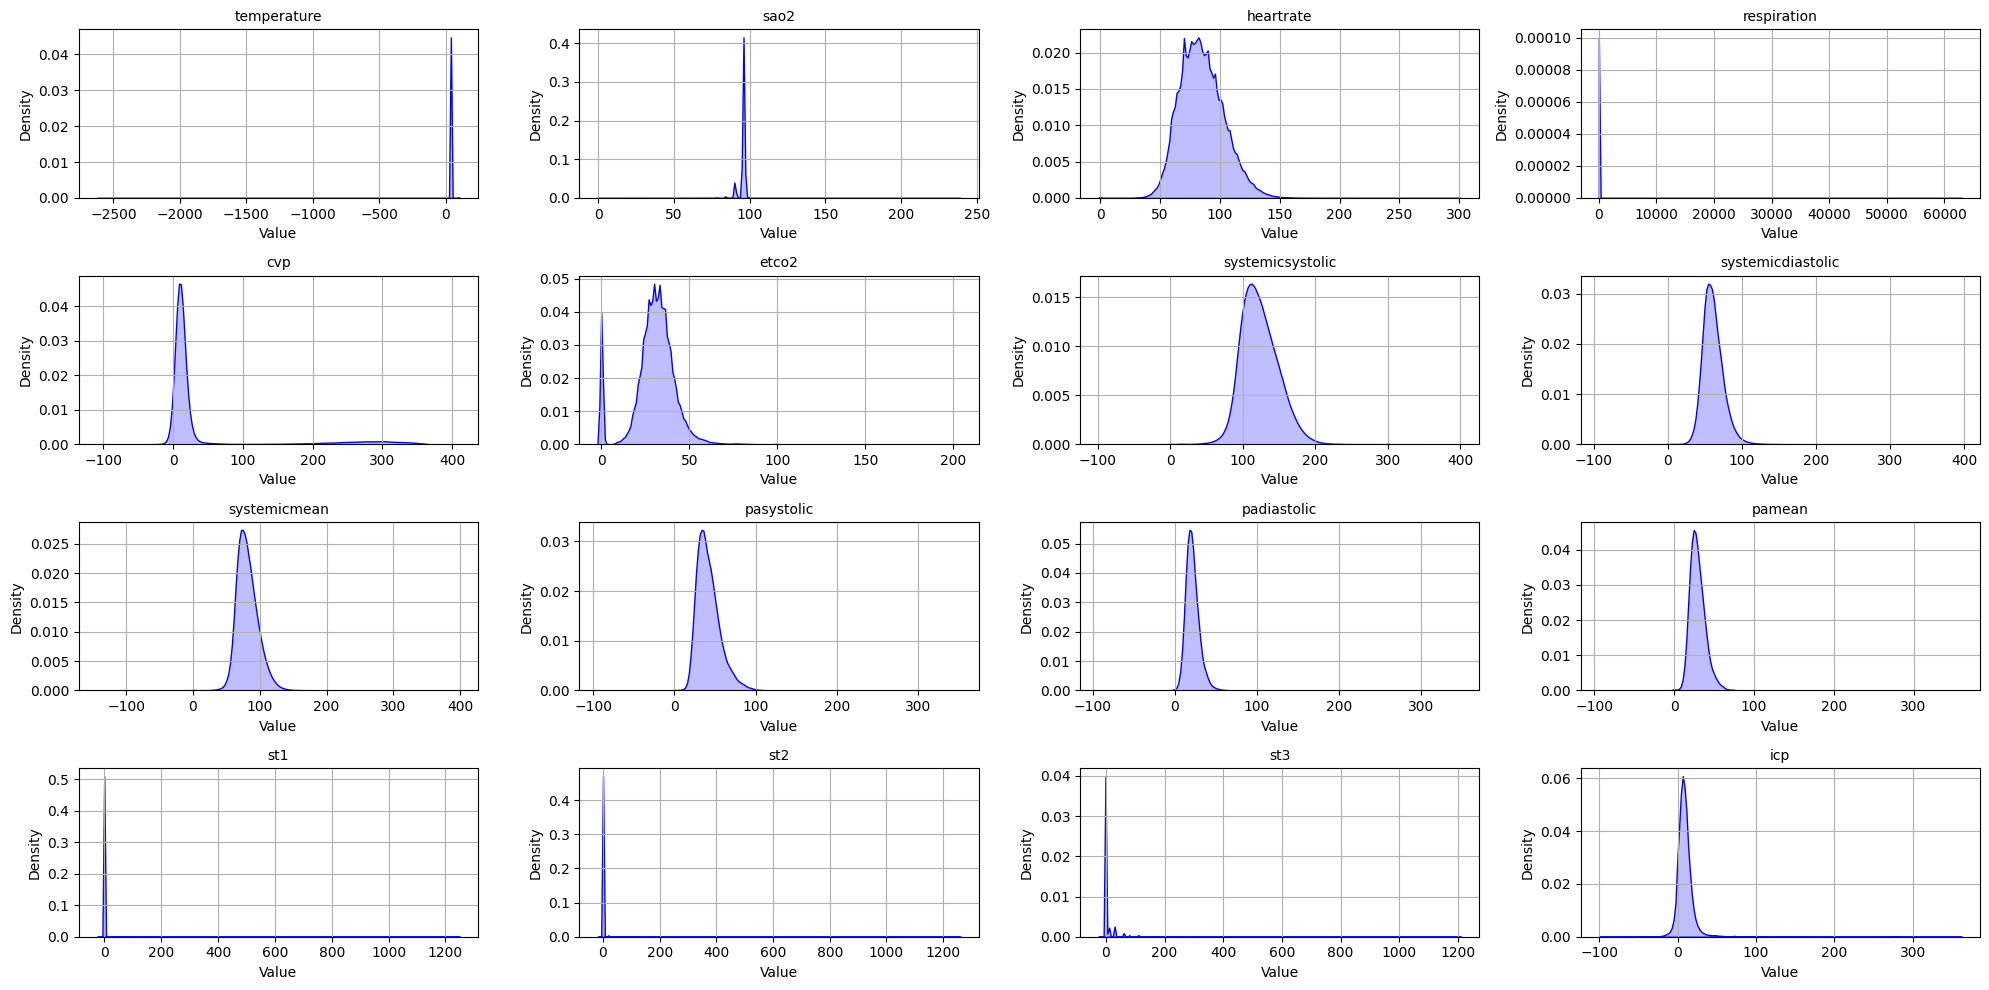

In [9]:
import seaborn as sns


rows = (len(vitalp.columns) + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 4, figsize=(20, 10), sharey=False)
axes = axes.flatten()

for i, column in enumerate(vitalp.columns):
    sns.kdeplot(data=vitalp[column].dropna(), fill=True, color="blue", ax=axes[i])
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")
    axes[i].grid(True)
    
for j in range(len(vitalp.columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


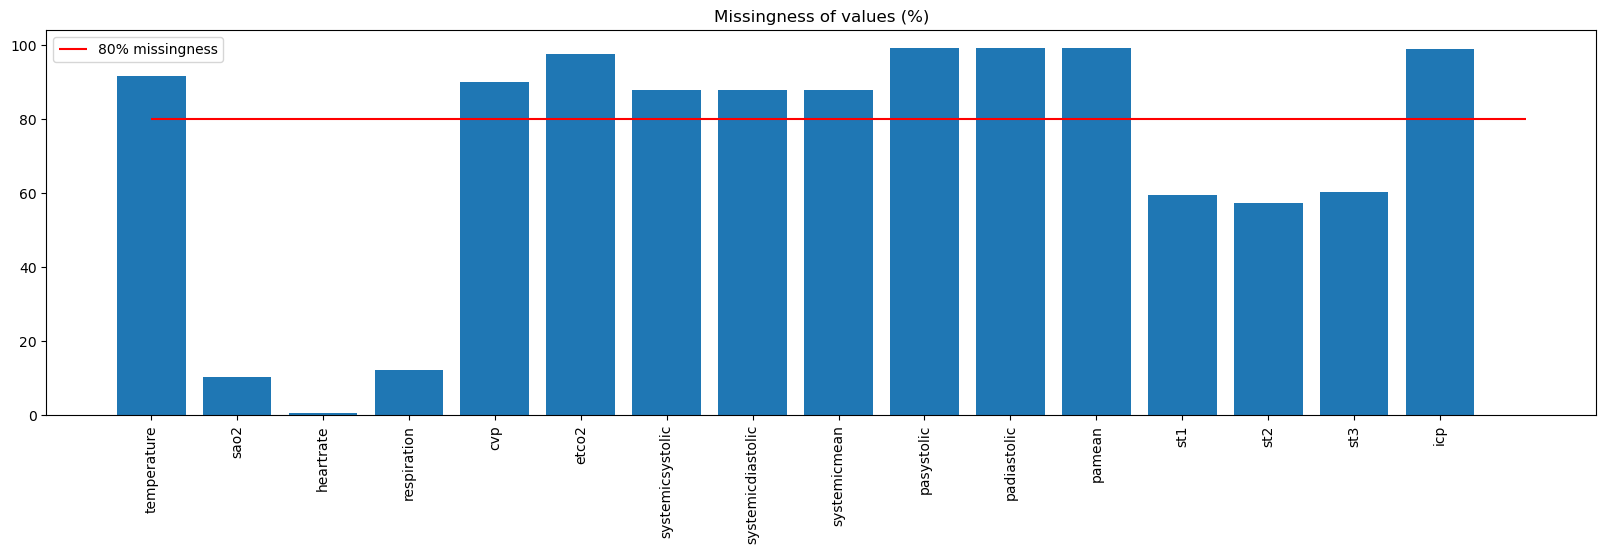

In [10]:
df=vitalp.copy()
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio']) * 100
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [11]:
vitalp

temperature  sao2  heartrate  \
patientunitstayid observationoffset                                 
141168            120                        NaN  93.0      140.0   
                  125                        NaN   NaN      140.0   
                  130                        NaN   NaN      140.0   
                  135                        NaN   NaN      140.0   
                  140                        NaN   NaN      140.0   
...                                          ...   ...        ...   
3353251           16220                      NaN  84.0       73.0   
                  16225                      NaN  68.0       74.0   
                  16230                      NaN  82.0       73.0   
                  16235                      NaN  95.0       70.0   
                  16240                      NaN  96.0       70.0   

                                     respiration  cvp  etco2  \
patientunitstayid observationoffset                            
141168            120                        NaN  NaN    NaN   
                  125                        NaN  NaN    NaN   
                  130                        NaN  NaN    NaN   
                  135                        NaN  NaN    NaN   
                  140                        NaN  NaN    NaN   
...                                          ...  ...    ...   
3353251           16220                      NaN  NaN    NaN   
                  16225                      NaN  NaN    NaN   
                  16230                      NaN  NaN    NaN   
                  16235                      NaN  NaN    NaN   
                  16240                      NaN  NaN    NaN   

                                     systemicsystolic  systemicdiastolic  \
patientunitstayid observationoffset                                        
141168            120                             NaN                NaN   
                  125                             NaN                NaN   
                  130                             NaN                NaN   
                  135                             NaN                NaN   
                  140                             NaN                NaN   
...                                               ...                ...   
3353251           16220                           NaN                NaN   
                  16225                           NaN                NaN   
                  16230                           NaN                NaN   
                  16235                           NaN                NaN   
                  16240                           NaN                NaN   

                                     systemicmean  pasystolic  padiastolic  \
patientunitstayid observationoffset                                          
141168            120                         NaN         NaN          NaN   
                  125                         NaN         NaN          NaN   
                  130                         NaN         NaN          NaN   
                  135                         NaN         NaN          NaN   
                  140                         NaN         NaN          NaN   
...                                           ...         ...          ...   
3353251           16220                       NaN         NaN          NaN   
                  16225                       NaN         NaN          NaN   
                  16230                       NaN         NaN          NaN   
                  16235                       NaN         NaN          NaN   
                  16240                       NaN         NaN          NaN   

                                     pamean  st1  st2  st3  icp  
patientunitstayid observationoffset                              
141168            120                   NaN  NaN  NaN  NaN  NaN  
                  125                   NaN  NaN  NaN  NaN  NaN  
                  130                 

In [12]:
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
padiastolic,99.233759
pasystolic,99.233719
pamean,99.226772
icp,98.994351
etco2,97.753351
temperature,91.636574
cvp,89.967245
systemicdiastolic,87.934308
systemicsystolic,87.932545
systemicmean,87.842751


In [ ]:
percentiles = [0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999]
percentile_results = df.dropna().quantile(percentiles)
percentile_df = pd.DataFrame(percentile_results)
percentile_df.head(n=10)

## after

In [13]:
df_after= vitalp.copy()
df_after.iloc[:, :] = df_after.iloc[:, :].notna().astype(int)   #NaN 值替换为 0，非 NaN 值替换为 1
df_after= df_after.groupby('patientunitstayid').max()
df_after = df_after[(df_after.iloc[:, 1:] != 0).any(axis=1)]

In [14]:
df_after

,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
patientunitstayid,,,,,,,,,,,,,,,,
141168,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141265,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
141266,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141276,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
141284,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353147,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3353194,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3353213,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [16]:
missing_ratio = pd.DataFrame(df_after.eq(0).sum() / len(df_after.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
icp,99.258395
padiastolic,98.535994
pasystolic,98.534517
pamean,98.502017
etco2,96.027537
temperature,90.206970
cvp,87.807833
systemicdiastolic,84.804479
systemicsystolic,84.801525
systemicmean,84.627203


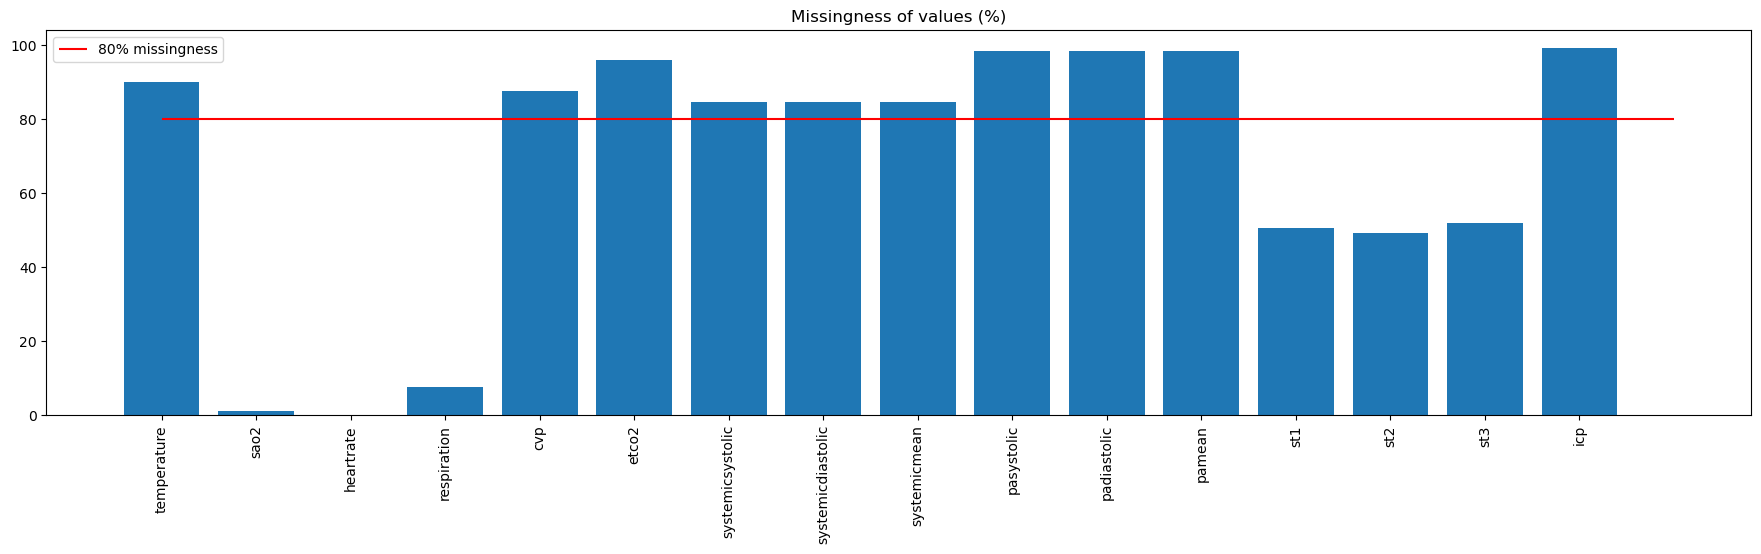

In [8]:
plt.rcParams["figure.figsize"] = (22,5)
missing_ratio = pd.DataFrame(df_after.eq(0).sum() / len(df_after.index), columns = ['missing ratio']) * 100
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [18]:
low_zero_ratio_tests = missing_ratio[missing_ratio['missing ratio %'] > 70]

low_zero_ratio_tests_names = low_zero_ratio_tests.index.tolist()

print("lab test of missing_ratio > 70%:")
for test_name in low_zero_ratio_tests_names:
    print(test_name)

lab test of missing_ratio > 70%:
icp
padiastolic
pasystolic
pamean
etco2
temperature
cvp
systemicdiastolic
systemicsystolic
systemicmean


In [21]:
columns_of_interest = ['icp', 'padiastolic', 'pasystolic','pamean', 'etco2' ,'temperature' ,'cvp' ,'systemicdiastolic', 'systemicsystolic', 'systemicmean' ]
patients_with_ones = df_after[df_after[columns_of_interest].eq(1).any(axis=1)]
patients_with_ones

,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
patientunitstayid,,,,,,,,,,,,,,,,
141168,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141266,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141276,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
141288,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
141329,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352922,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3352979,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353077,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
one_counts = patients_with_ones[columns_of_interest].eq(0).sum()
print(one_counts)


icp                  18623
padiastolic          18134
pasystolic           18133
pamean               18111
etco2                16436
temperature          12496
cvp                  10872
systemicdiastolic     8839
systemicsystolic      8837
systemicmean          8719
dtype: int64


In [25]:
one_counts = patients_with_ones[columns_of_interest].eq(1).sum()
print(one_counts)

icp                    502
padiastolic            991
pasystolic             992
pamean                1014
etco2                 2689
temperature           6629
cvp                   8253
systemicdiastolic    10286
systemicsystolic     10288
systemicmean         10406
dtype: int64
